In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# Importing the dataset
df = pd.read_csv('seattle-weather.csv')

In [4]:
# Misalnya, kita ingin menghapus semua baris dengan target 0
delete_values = ['snow', 'drizzle', 'fog']

for i in delete_values:
    # Temukan indeks semua baris yang memiliki target 0
    indeks_target_tertentu = df[df['weather'] == i].index

    # Gunakan indeks tersebut untuk menghapus baris-baris tersebut dari DataFrame
    df = df.drop(index=indeks_target_tertentu)

# Sekarang, dataset_cleaned akan berisi DataFrame tanpa baris yang memiliki target tertentu
    
X = df[['precipitation', 'wind']].values
y = df['weather'].values

# Melakukan encoding pada y agar dtype menjadi int dan dapat diproses
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=2))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=len(np.unique(y)), kernel_initializer='uniform', activation='softmax'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)
#

Epoch 1/100
96/96 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5104
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.7656
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.8198
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8510
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8604
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8646
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8760
Epoch 8/100
96/96 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.8823
Epoch 9/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.8875
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8885
Epoch 11/

11/11 [==============================] - 0s 4ms/step
Akurasi: 0.9750778816199377


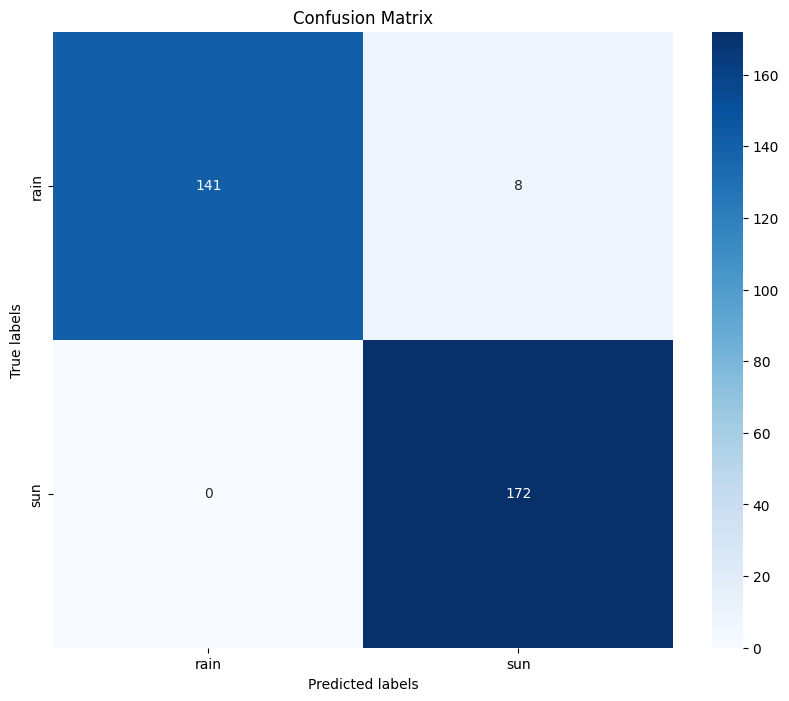

In [7]:
# Predicting the Test set results
y_pred = np.argmax(classifier.predict(X_test), axis=-1)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Akurasi:", accuracy)

unique_target = np.unique(y)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_target, yticklabels=unique_target)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()